<h1><strong><u>Naive Bayes Model</u></strong></h1>

<h2><strong><u>Data Preparation</u></strong></h2>

In [1]:
%%capture
%run DataPreparation.ipynb

<h2><strong><u>Naive Bayes Model Selection</u></strong></h2>

I believe that the <strong>BernoulliNB</strong> model is the best Naive Bayes model for this dataset because it is designed for binary/boolean features which is what this dataset has.

<h3><strong><u>Validation Curves</u></strong></h3>

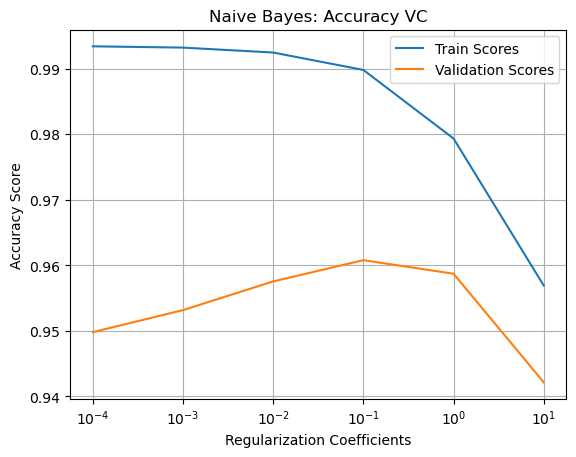

In [2]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", BernoulliNB())
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Naive Bayes: Accuracy VC")
plt.ylabel("Accuracy Score")
plt.xlabel("Regularization Coefficients")
plt.semilogx(alphas, train_scores_mean, label="Train Scores")
plt.semilogx(alphas, validation_scores_mean, label="Validation Scores")
plt.grid()
plt.minorticks_off()
plt.legend()

<h3><strong><u>Cross Validation Testing</u></strong></h3>

In [3]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", BernoulliNB())
    ]
)
param_grid = {
    "clf__alpha": [0.1, 0.5, 0.7, 0.9, 1, 3],
}

model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
model.fit(X_train, y_train)
nb_classifier = model.best_estimator_
print(model.best_params_)

def nb_clickbait_classifier():
    return nb_classifier

{'clf__alpha': 0.1}


<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
The scoring metrics that I used for the Grid Search cross-validation test was accuracy since the dataset is balanced. I chose to use the Bernoulli model because I believe its strengths fits the needs of this dataset. Using a logarithmic range of regularization coefficients, I found that 0.1-10 was the best range with 1 being the most likely regularization coefficient to be chosen in the Grid Search test.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curves</u></strong></h4>

In [4]:
for key, value in clf_metrics.items():
    nb_train_sizes, nb_train_scores, nb_validation_scores = learning_curve(
        nb_classifier,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    nb_train_scores_mean = np.mean(nb_train_scores, axis=1)
    nb_train_scores_std = np.std(nb_train_scores, axis=1)
    nb_validation_scores_mean = np.mean(nb_validation_scores, axis=1)
    nb_validation_scores_std = np.std(nb_validation_scores, axis=1)

    # Calculate spread of data around the mean
    nb_train_range_minus = nb_train_scores_mean - nb_train_scores_std
    nb_train_range_plus = nb_train_scores_mean + nb_train_scores_std
    nb_validation_range_minus = nb_validation_scores_mean - nb_validation_scores_std
    nb_validation_range_plus = nb_validation_scores_mean + nb_validation_scores_std

    lc_dict[key] = [[nb_train_scores_mean, nb_validation_scores_mean],
                    [nb_train_range_minus, nb_train_range_plus], 
                    [nb_validation_range_minus, nb_validation_range_plus], 
                    nb_train_sizes]

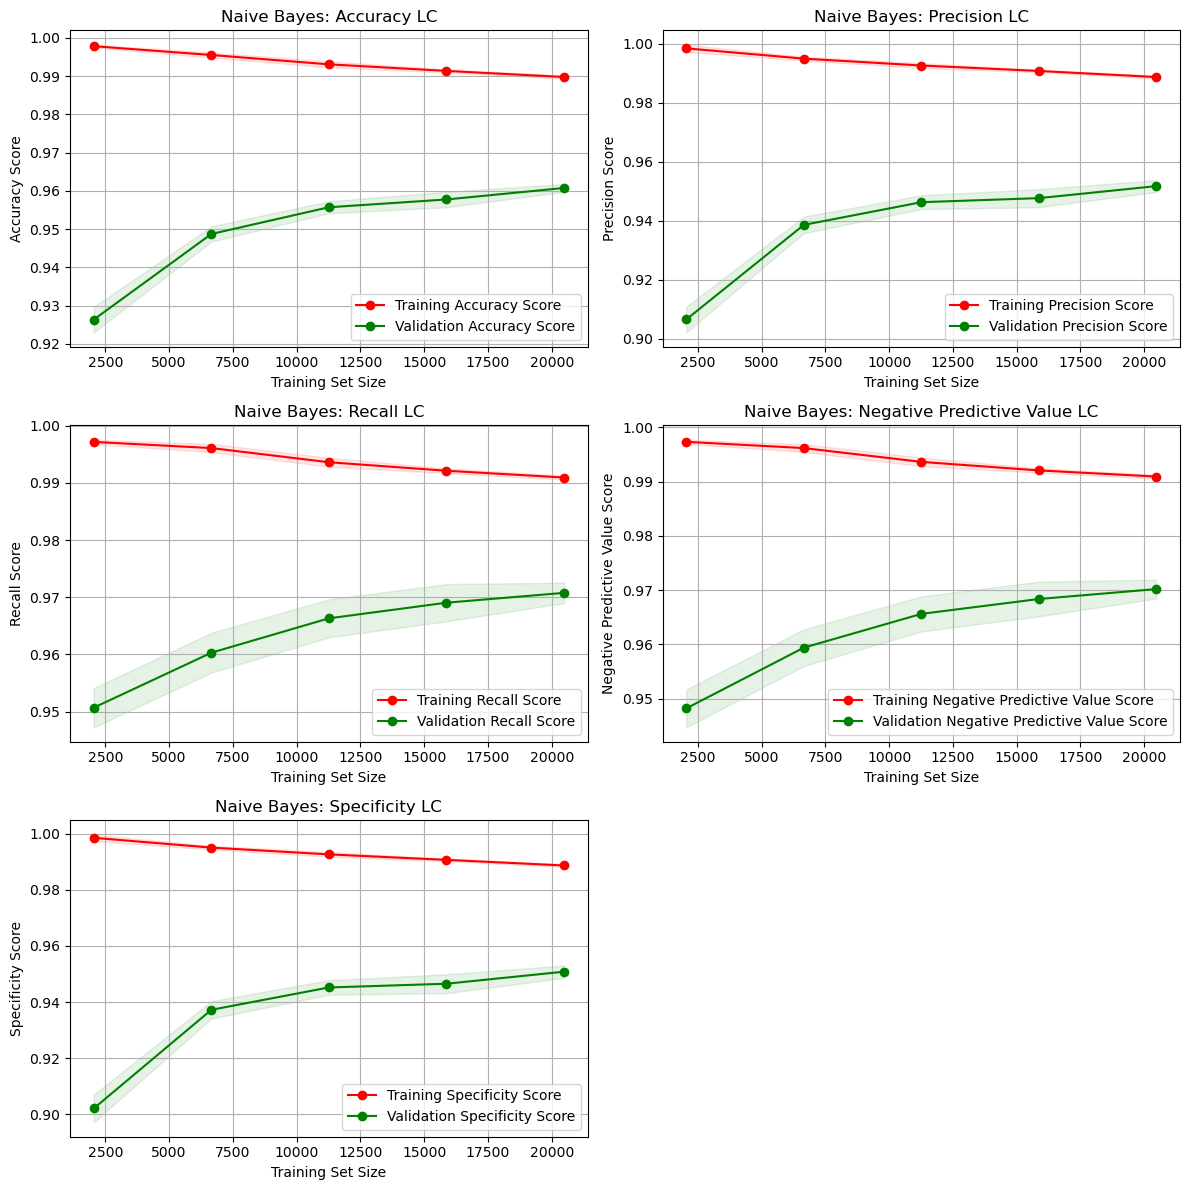

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in lc_dict.items():
    axs[count].set_title(f"Naive Bayes: {key} LC")
    axs[count].set_xlabel("Training Set Size")
    axs[count].set_ylabel(f"{key} Score")
    axs[count].grid()

    axs[count].fill_between(value[3], value[1][0], value[1][1], alpha=0.1, color="r")
    axs[count].fill_between(value[3], value[2][0], value[2][1], alpha=0.1, color="g")
    axs[count].plot(value[3], value[0][0], 'o-', color="r", label=f"Training {key} Score")
    axs[count].plot(value[3], value[0][1], 'o-', color="g", label=f"Validation {key} Score")
    axs[count].legend(loc="best")
    count += 1
    
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [6]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(nb_classifier, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [0.96113281 0.96171875 0.95957031 0.96191406 0.95957031]
Training Average and Standard Error:  0.96% ± 0.10% 

Precision
CV Training Scores:  [0.95243575 0.95355086 0.95230769 0.9525268  0.9478294 ]
Training Average and Standard Error:  0.95% ± 0.20% 

Recall
CV Training Scores:  [0.97068022 0.97069168 0.96756546 0.97225479 0.97264556]
Training Average and Standard Error:  0.97% ± 0.18% 

Negative Predictive Value
CV Training Scores:  [0.97015519 0.97017893 0.96706349 0.97169059 0.97193264]
Training Average and Standard Error:  0.97% ± 0.17% 

Specificity
CV Training Scores:  [0.95160031 0.95275283 0.95158141 0.95158141 0.94650527]
Training Average and Standard Error:  0.95% ± 0.22% 



Text(0.5, 1.0, 'Naive Bayes: Confusion Matrix (Evaluation)')

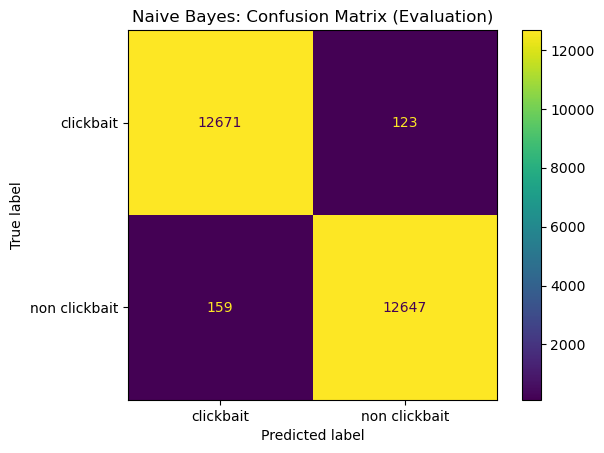

In [7]:
#Training Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(nb_classifier, X_train, y_train, labels=['clickbait', 'non clickbait'])
disp.ax_.set_title("Naive Bayes: Confusion Matrix (Evaluation)")

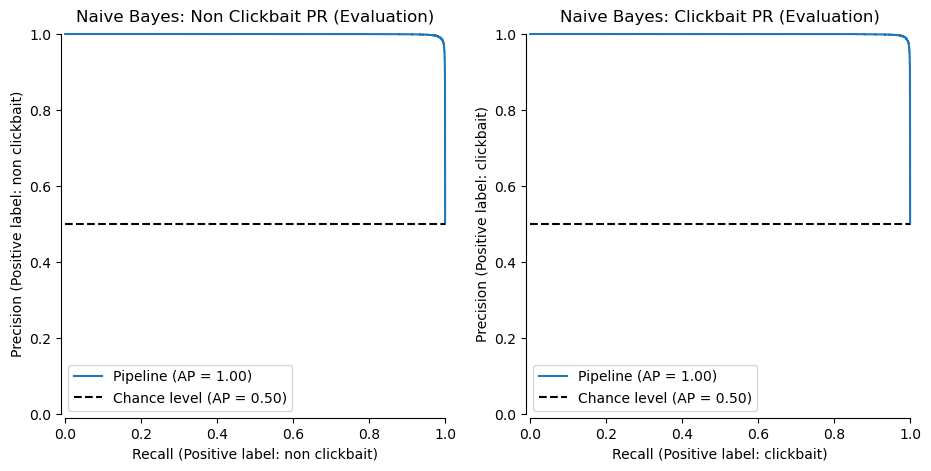

Exception ignored in: <function ResourceTracker.__del__ at 0x108759bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104245bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1045d9bc0>
Traceback (most recent call last

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(11, 11))
axs = axs.flatten()
count = 0
for label in train_labels:
    disp = PrecisionRecallDisplay.from_estimator(nb_classifier, X_train, y_train, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"Naive Bayes: {label.title()} PR (Evaluation)")
    count += 1

plt.show()

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
In the evaluation of my selected Naive Bayes model, I found positive results for all evaluation methods. The learning curves yielded good results and the 'cross_val_score' function evaluation results reinforced the learning curve values. In addition, the Confusion Matrix and the Precision-Recall plots displayed good results. Therefore, I will move forward with this model to the 'Final Model Selection' section.